In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


eq = pd.read_csv("russia_losses_equipment.csv")
pr = pd.read_csv("russia_losses_personnel.csv")

In [83]:
eq.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,greatest losses direction
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [84]:
max(eq['special equipment'])

nan

In [85]:
pr.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [86]:
pr.nunique()

date          112
day           112
personnel     104
personnel*      2
POW            21
dtype: int64

In [87]:
pr.groupby(['personnel*']).nunique()

,date,day,personnel,POW
personnel*,,,,
about,106,106,104,19
more,6,6,2,3


In [88]:
pr['days'] = pr.index

In [89]:
X = pr['days'].values.reshape(-1, 1)
y = pr['personnel'].values

In [92]:
ols = LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)
r2 = model.score(X,y)

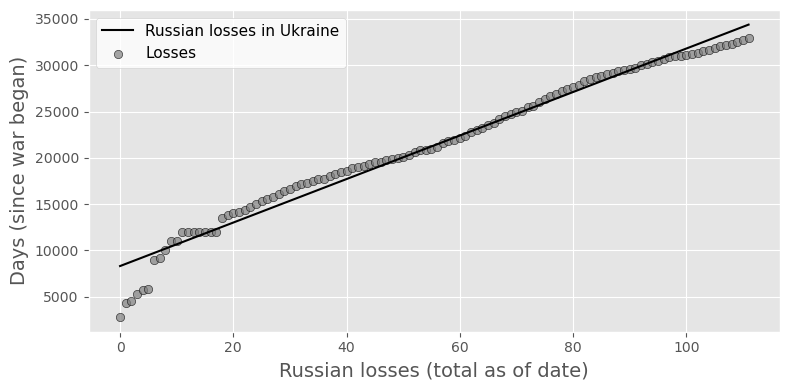

In [93]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X, response, color='k', label = "Russian losses in Ukraine")
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label = 'Losses')
ax.set_ylabel('Days (since war began)', fontsize = 14)
ax.set_xlabel("Russian losses (total as of date)", fontsize = 14)
ax.legend(facecolor='white', fontsize = 11)
fig.tight_layout()

In [98]:
day_114 = model.predict(np.array([[114]]))
day_1 = model.predict()

In [99]:
print(day_114)

[35094.34536338]
